# Case Study 2 : Analyzing data from MovieLens

** Due Date: October 27, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

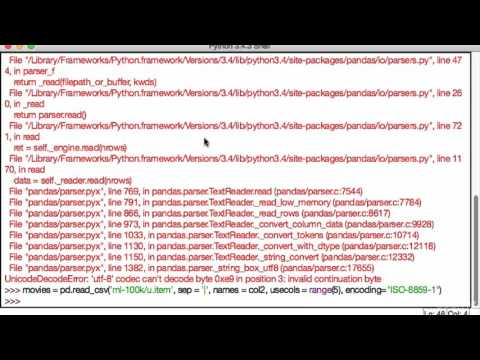

In [2]:
YouTubeVideo('dAjRNi6bhSE')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.


In [43]:
import pandas as pd
import scipy
import warnings
import matplotlib.pyplot as plt
%matplotlib inline  
warnings.filterwarnings('ignore')

AGES = [1,18,25,35,45,50,56]
GENRES = ['Animation', 'Comedy','War', 'Drama', 'Documentary', 'Film-Noir', 'Horror', 'Musical', 'Romance'
          'Crime', 'Action', 'Thriller', 'Sci-Fi', 'Children\'s', 'Western', 'Adventure']

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None,names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None,names=mnames)
data = pd.merge(pd.merge(ratings, users), movies)

data.to_hdf('movies.h5','table',append=True)

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


### Movies with Average Rating > 4.5

In [4]:
data = pd.read_hdf('movies.h5', 'table')
gb = data.groupby('title')['rating'].mean()
gb = gb[gb > 4.5]
print (len(gb))

21


### Movies with Average Rating > 4.5 from Women


In [5]:
women_data = data[data['gender'] != 'M'] 
gb = women_data.groupby('title')['rating'].mean()
gb = gb[gb > 4.5]
print (len(gb))

51


### Movies with Average Rating > 4.5 from Men

In [6]:
men_data = data[data['gender'] != 'F'] 
gb = men_data.groupby('title')['rating'].mean()
gb = gb[gb > 4.5]
print (len(gb))

23


### Movies with Median rating over 4.5 from 34+ Men


In [7]:
men_30_data = data[(data['gender'] != 'F') & (data['age'] >= 30)] 
gb = men_30_data.groupby('title')['rating'].median()
gb = gb[gb > 4.5]
print (len(gb))

86


### Movies with Median rating over 4.5 from 34+ Women


In [8]:
women_30_data = data[(data['gender'] != 'M') & (data['age'] >= 30)] 
gb = women_30_data.groupby('title')['rating'].median()
gb = gb[gb > 4.5]
print (len(gb))

149


### What is Popular?
---

As seen below, there are several with 5 overall ratings, but this could be due to the fact that they were reviewed few times.  

In [9]:
gb = data.groupby('title')['rating'].mean()
gb.sort(ascending=False)
gb[0:10]

title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: rating, dtype: float64

Popularity involves both a combination of being held in high regard, and being supported by general people.  For this reason, we defined popular as the most reviewed movies with greater than 4.0 average, which takes both factors into account

In [10]:
m = data.groupby('title').size()
gb = data.groupby('title')['rating'].mean()
df = pd.concat([m, gb], axis=1)
df = df[df['rating'] >= 4.0]
df.sort([0], ascending=False)[0:10]

,0,rating
title,,
American Beauty (1999),61704,4.317386
Star Wars: Episode IV - A New Hope (1977),53838,4.453694
Star Wars: Episode V - The Empire Strikes Back (1980),53820,4.292977
Star Wars: Episode VI - Return of the Jedi (1983),51894,4.022893
Saving Private Ryan (1998),47754,4.337354
Terminator 2: Judgment Day (1991),47682,4.058513
"Matrix, The (1999)",46620,4.315830
"Silence of the Lambs, The (1991)",46404,4.351823
Raiders of the Lost Ark (1981),45252,4.477725


### Easiest Groups to Please
---
To figure out the easiest groups to please, we took the mean rating for men and women in 10 year
age range.


In [11]:
female_lis = []
male_lis = []
for y in ['M','F']:
    lis = []
    for x in AGES:
        ages = data[(data['gender'] == y) & (data['age'] == x)] 
        mean = ages['rating'].mean()
        lis.append(mean)
        print ('Gender: {}, Age:{} --- {}'.format(y,x, mean))
    if y == 'M':
        male_lis = lis
    else:
        female_lis = lis

Gender: M, Age:1 --- 3.5174608355091386
Gender: M, Age:18 --- 3.525476254262937
Gender: M, Age:25 --- 3.52678031398743
Gender: M, Age:35 --- 3.604433892864308
Gender: M, Age:45 --- 3.627942140013104
Gender: M, Age:50 --- 3.687098078124426
Gender: M, Age:56 --- 3.720327237077854
Gender: F, Age:1 --- 3.616290925569276
Gender: F, Age:18 --- 3.4531446056310124
Gender: F, Age:25 --- 3.6067002408583315
Gender: F, Age:35 --- 3.6596527398783176
Gender: F, Age:45 --- 3.663044379925342
Gender: F, Age:50 --- 3.7971102745792735
Gender: F, Age:56 --- 3.915534297206218


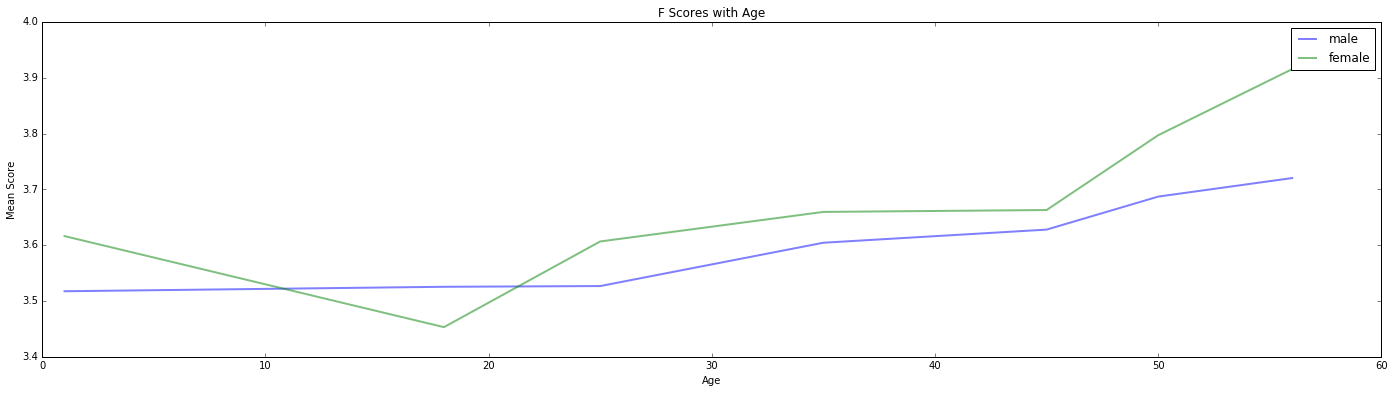

In [12]:
plt.figure(5, figsize=(24,6))

plt.plot(AGES, male_lis, linewidth=2, alpha=0.5, label='male')
plt.plot(AGES, female_lis, linewidth=2, alpha=0.5, label='female')
plt.ylabel('Mean Score')
plt.xlabel('Age')
plt.title('{} Scores with Age'.format(y))
plt.legend()
plt.show()

When splitting the data up by gender and ages, we can make a couple observations:
* On the average, female's rank movies higher than men (excluding the 18-24 bracket)
* As users aged, they tended to give higher rankings, which can be see by the the lines sloping upward over time
* On average, older women are the easiest demographic to please

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

### Hist of Ratings of Movies

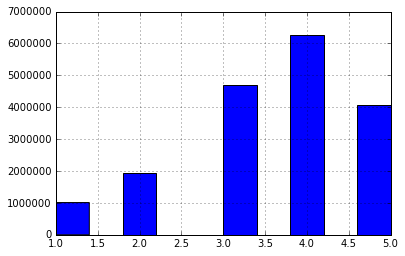

In [13]:
data['rating'].hist()

### Number of Ratings Recieved

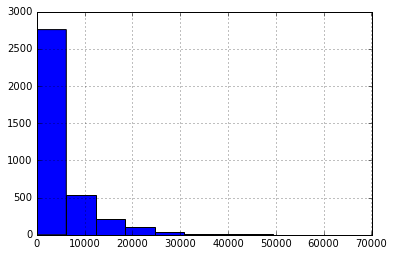

In [14]:
m = data.groupby('title').size()
m.hist()

### Average Movie Rating

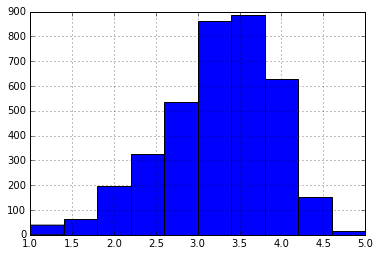

In [15]:
gb = data.groupby('title')['rating'].mean()
gb.hist()

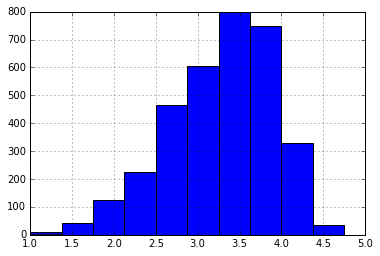

In [16]:
m = data.groupby('title').size()
gb = data.groupby('title')['rating'].mean()
df = pd.concat([m, gb], axis=1)
df=df[df[0] > 100]
df['rating'].hist()

##### What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
---
The tail of the histogram of is longer (positive and negative) for movies with less than 100 rankings, meaning that when more people have reviewed a movie, it's average ranking tends to regress toward the mean.

---

##### Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?
---
I would trust movies rated 100 times are actually good. Although the histogram distribution of these movies is tighter, it eliminates situations where a movie might have a cult following from a subset of users


### Conjectures about Distribution of Ratings
___

##### Ranking Polarization by Age 

,rating,rating
age,,
1,1.208396,3.549520
18,1.165967,3.507573
25,1.127173,3.545235
35,1.078098,3.618162
45,1.065379,3.638062
50,1.061373,3.714512
56,1.062538,3.766632


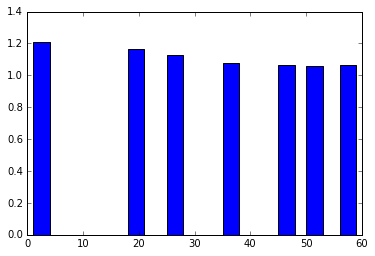

In [17]:
df = pd.DataFrame(data.groupby('age')['rating'].std())
df2 = pd.DataFrame(data.groupby('age')['rating'].mean())

plt.bar(df.index,df['rating'], 3)
pd.concat([df, df2], axis=1, join_axes=[df.index])

First, we analyzed the Standard Deviation and mean of each age group.  A larger Standard Deviation would indicate a wider deviation amongst ratings, which would indicate more extreme ratings.

Based off this analysis, standard deviation is larger for younger ages and decreases over time.  

Based on mean, older age groups tend to give higher ratings than younger age groups

Age: 1, Percentage of 5s and 1s: 33.22185880710007
Age: 18, Percentage of 5s and 1s: 29.215521750501264
Age: 25, Percentage of 5s and 1s: 27.714912679873393
Age: 35, Percentage of 5s and 1s: 27.02321070536625
Age: 45, Percentage of 5s and 1s: 26.964236605167816
Age: 50, Percentage of 5s and 1s: 29.72547937646572
Age: 56, Percentage of 5s and 1s: 31.766374419804023


<Container object of 7 artists>

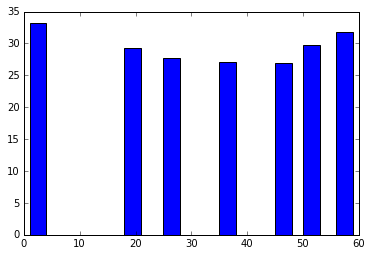

In [18]:
percts = []
for a in AGES:
    d = data[data['age'] == a]
    total = len(d)
    d=d[(d['rating'] == 1) | (d['rating'] == 5)]
    fives_and_ones = len(d)
    percts.append(100* fives_and_ones / total)
    print ('Age: {}, Percentage of 5s and 1s: {}'.format(a, (100* fives_and_ones / total)))

plt.bar(AGES, percts, 3)

When analyzing the ratings based on 1's and 5's, the youngest and oldest age groups had a greater percentage of submissions that were either 1 or 5, supporting the idea that younger age groups are more polarized on their rankings
___

##### Average Ranking, Median Ranking 

In [19]:
pd.DataFrame(data.groupby('age')['rating'].value_counts())

rating
age rating         
1   4        158544
    5        122436
    3        114840
    2         53694
    1         40284
18  4       1084338
    3        856818
    5        730044
    2        397314
    1        235134
25  4       2462832
    3       1877166
    5       1543140
    2        806706
    1        430164
35  4       1295694
    3        953820
    5        804780
    2        364554
    1        163206
45  4        546012
    3        401598
    5        344556
    2        151866
    1         61362
50  4        476712
    5        334800
    3        332370
    2        107874
    1         53064
56  4        257346
    5        193824
    3        164934
    2         54018
    1         27918

Here we see the most popular votes for all ages.  The most popular ranking for each was 4.  However, 5 was second amongst children, and 56+, which makes sense with regards to our observations about percentages of 1s and 5s from earlier.  Also, notice that although 1 was the least popular rank in each group, it was much closer in count to the other numbers for children than it was for any other age

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

### Scatterplot of Men vs Women


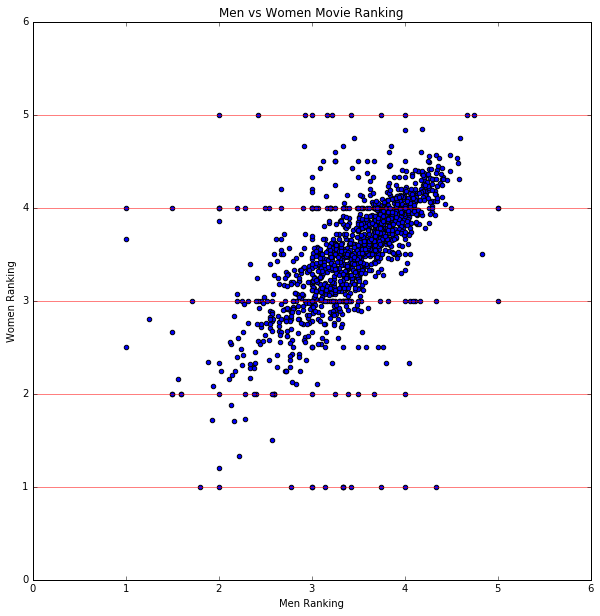

In [91]:
plt.figure(5, figsize=(10,10))

women_data = data[data['gender'] != 'M'] 
men_data = data[data['gender'] != 'F']

w_ser = women_data.groupby('title')['rating'].mean()
m_ser = men_data.groupby('title')['rating'].mean()

df = pd.concat([w_ser, m_ser], axis=1, join='inner')
df['men'] = df[[1]]
df['women'] = df[[0]]
df = df[['men', 'women']]

plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
plt.axhline(y=2, linewidth=1, color='r', alpha=0.5)
plt.axhline(y=3, linewidth=1, color='r', alpha=0.5)
plt.axhline(y=4, linewidth=1, color='r', alpha=0.5)
plt.axhline(y=5, linewidth=1, color='r', alpha=0.5)


plt.ylabel('Women Ranking')
plt.xlabel('Men Ranking')
plt.title('Men vs Women Movie Ranking')
plt.scatter(df['men'], df['women'])
plt.show()

### Scatterplot of Men vs Women with Movies Rated 200+ Times

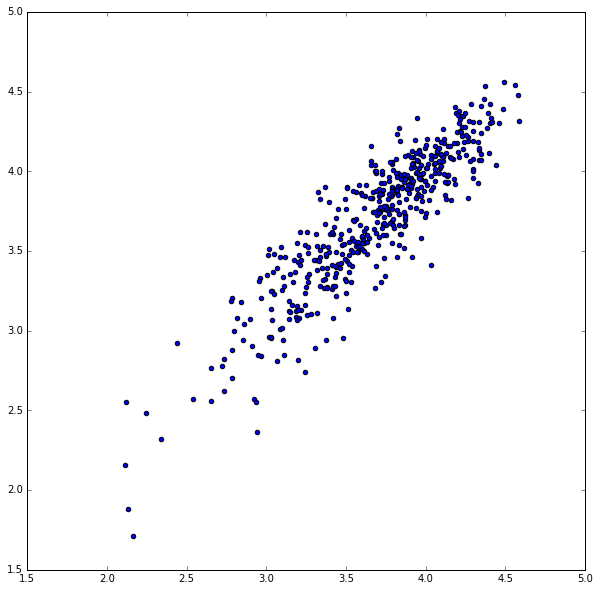

In [92]:
plt.figure(5, figsize=(10,10))

women_data = data[data['gender'] != 'M'] 
men_data = data[data['gender'] != 'F']

w_ser = women_data.groupby('title')['rating'].mean()
m_ser = men_data.groupby('title')['rating'].mean()
count_df = data.groupby('title').count()

df2 = pd.concat([w_ser, m_ser, count_df], axis=1, join='inner')
df2['men'] = df2[[1]]
df2['women'] = df2[[0]]
df2['count'] = df2[[2]]

df2 = df2[df2['count'] > 200]
df2 = df2[['men', 'women', 'count']]

plt.scatter(df2['men'], df2['women'])
plt.show()

### Correlation Coefficent Between Ratings of Men and Women.

In [93]:
df = df[['men', 'women']]
df.corr()

,men,women
men,1.000000,0.636447
women,0.636447,1.000000


In [94]:
df2 = df2[['men', 'women']]
df2.corr()

,men,women
men,1.000000,0.902412
women,0.902412,1.000000


The correlation coefficient between men and women's average ranking of movies is 0.836 with movies rated 200+ times, and 0.636 with every movie.  There is a stronger correlation with movies rated 200+ times because a larger sample size results reduces the noise in the average rankings.

Depending on the data you're working with, the definition of a 'strong' correlation varies.  However, considering that we're not looking for an exact match between men and women rankings, just a relationship, 0.902 would indicate that the mean ranking of each gender is correlated linearly with the other gender.

### Circumstances where One gender can  Predict Rating by the Other

___ 

#### Minimum Number of Rankings from Each Gender

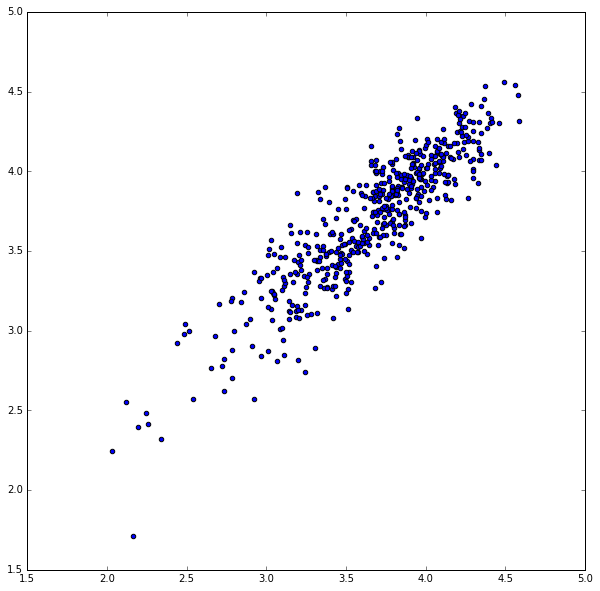

,men,women
men,1.000000,0.900166
women,0.900166,1.000000


In [98]:
plt.figure(5, figsize=(10,10))

w_count_df = women_data.groupby('title')['rating'].count()
m_count_df = men_data.groupby('title')['rating'].count()

count_df = pd.concat([w_count_df, m_count_df], axis=1, join_axes=[w_count_df.index])

count_df['men'] = count_df[[0]]
count_df['women'] = count_df[[1]]
count_df = count_df[(count_df['men'] > 50) & (count_df['women'] > 50)]

df3 = pd.concat([w_ser, m_ser, count_df], axis=1, join='inner')
df3['men'] = df3[[1]]
df3['women'] = df3[[0]]
df3['count'] = df3[[2]]
df3 = df3[['men', 'women']]

plt.scatter(df3['men'], df3['women'])
plt.show()
df3.corr()

After seeing a stronger correlation between men and women's rankings when we restricted movies to those with 200+ ratings, we changed this curriculum to requiring 50+ rankings from each gender.  This resulted in a **0.900** correlation coefficient.  

So as a whole, men and women's ratings of movies, when they are rated 50+ times by each, or rated 200+ times total, are very similar, and __you could reasonably predict genders ranking from another based on movies that fit thess requirements__

---
#### Male and Female Ranking by Genre

In [99]:
for genre in GENRES:
    genres_df = data[data['genres'].str.find(genre) != -1]
    women_data = genres_df[genres_df['gender'] != 'M']
    men_data = genres_df[genres_df['gender'] != 'F']

    w_ser = women_data.groupby('title')['rating'].mean()
    m_ser = men_data.groupby('title')['rating'].mean()
    
    df = pd.concat([w_ser, m_ser], axis=1, join='inner')
    
    if (len(df) >= 15):
        df['men'] = df[[1]]
        df['women'] = df[[0]]
        df = df[['men', 'women']]
        print('{} has a correlation of: {} ({})'.format(genre, str(df.corr().values[0][1]), len(df)))

Comedy has a correlation of: 0.669299312611 (203)
War has a correlation of: 0.754796696795 (70)
Drama has a correlation of: 0.636446829775 (1359)
Action has a correlation of: 0.69670434064 (88)
Thriller has a correlation of: 0.903842512461 (97)
Sci-Fi has a correlation of: 0.878060099048 (22)
Children's has a correlation of: 0.822159898369 (26)
Adventure has a correlation of: 0.929361931915 (32)


Here, we can see that certain genre's have a stronger correlation than others.  For example, the Correlation Coefficient for Adventure is 0.929, which means if men/women likes/dislikes an adventure film, there is a strong chance the other gender will feel similarly

Also interesting is the genres where the correlation coefficient noticably drops.  Dramas, for example, while still showing a relationship between the two genders, is not as strong as any of the other categories

These showings indicate that on movie genres such as ___ Thriller, Sci-F-, and Adventure ___ one gender can predict how much the other will like it.

Only one genre showed a strong negative correlation, Documentaries, but that was ommitted due to small sample size

#### Male and Female Ranking by Age

In [100]:
for age in AGES:
    age_df = data[data['age']== age]
    women_data = age_df[age_df['gender'] != 'M']
    men_data = age_df[age_df['gender'] != 'F']

    count_df = data.groupby('title').count()
    
    w_ser = women_data.groupby('title')['rating'].mean()
    m_ser = men_data.groupby('title')['rating'].mean()
    
    df = pd.concat([w_ser, m_ser, count_df], axis=1, join='inner')
    df['count'] = df[[2]]
    
    df=df[df['count'] > 200]
    if (len(df) >= 15):
        df['men'] = df[[1]]
        df['women'] = df[[0]]
        df = df[['men', 'women']]
        print('{} has a correlation of: {} ({})'.format(age, str(df.corr().values[0][1]), len(df)))

1 has a correlation of: 0.262693003369 (423)
18 has a correlation of: 0.645505605403 (500)
25 has a correlation of: 0.861162197875 (507)
35 has a correlation of: 0.75884810953 (507)
45 has a correlation of: 0.637563742109 (504)
50 has a correlation of: 0.6342284728 (500)
56 has a correlation of: 0.395674166706 (466)


A similar analysis of movies over 100 rankings shows that the correlation between male and female rankings is closer in the middle age groups, and further apart at younger and older age groups

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 2-TEAM NUMBER ???".